#4. Use dataset of your own choice and implement baseline models provided.

In [7]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


Load the Fashion MNIST dataset

#Lenet


In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


Reshape the data to fit LeNet5 input shape

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)



In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=120, activation='relu'),
    keras.layers.Dense(units=84, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

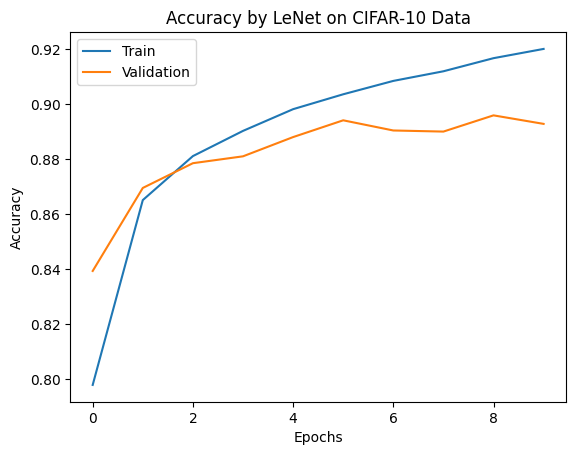

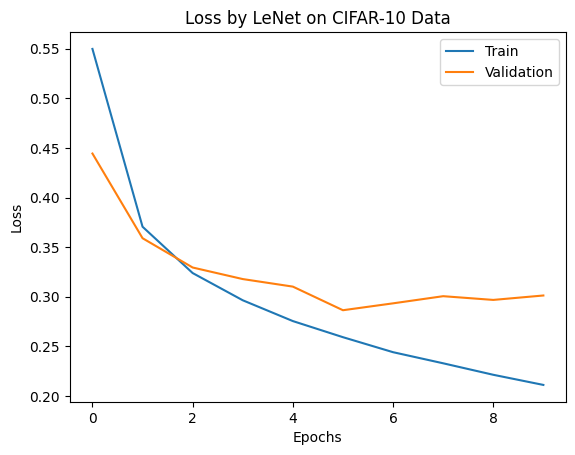

In [18]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= model.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)


313/313 [==============================] - 2s 7ms/step


array([[907,   0,  10,  19,   4,   0,  53,   0,   7,   0],
       [  3, 981,   0,  10,   1,   0,   3,   0,   2,   0],
       [ 27,   1, 776,   6,  88,   0,  99,   0,   3,   0],
       [ 18,  12,   5, 913,  23,   0,  24,   0,   5,   0],
       [  1,   1,  38,  33, 845,   0,  79,   0,   3,   0],
       [  0,   0,   0,   0,   0, 988,   0,  10,   0,   2],
       [186,   2,  43,  30,  74,   0, 651,   0,  14,   0],
       [  0,   0,   0,   0,   0,  21,   0, 970,   1,   8],
       [ 12,   0,   2,   2,   4,   3,   3,   2, 971,   1],
       [  1,   0,   0,   0,   0,  13,   0,  60,   0, 926]])

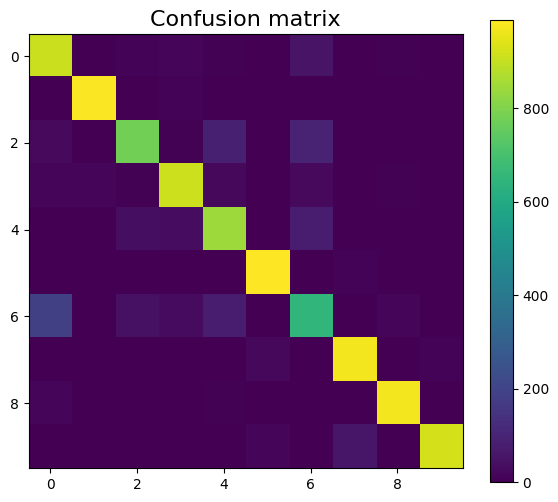

In [23]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.colorbar()
plt.show()

In [24]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.8928


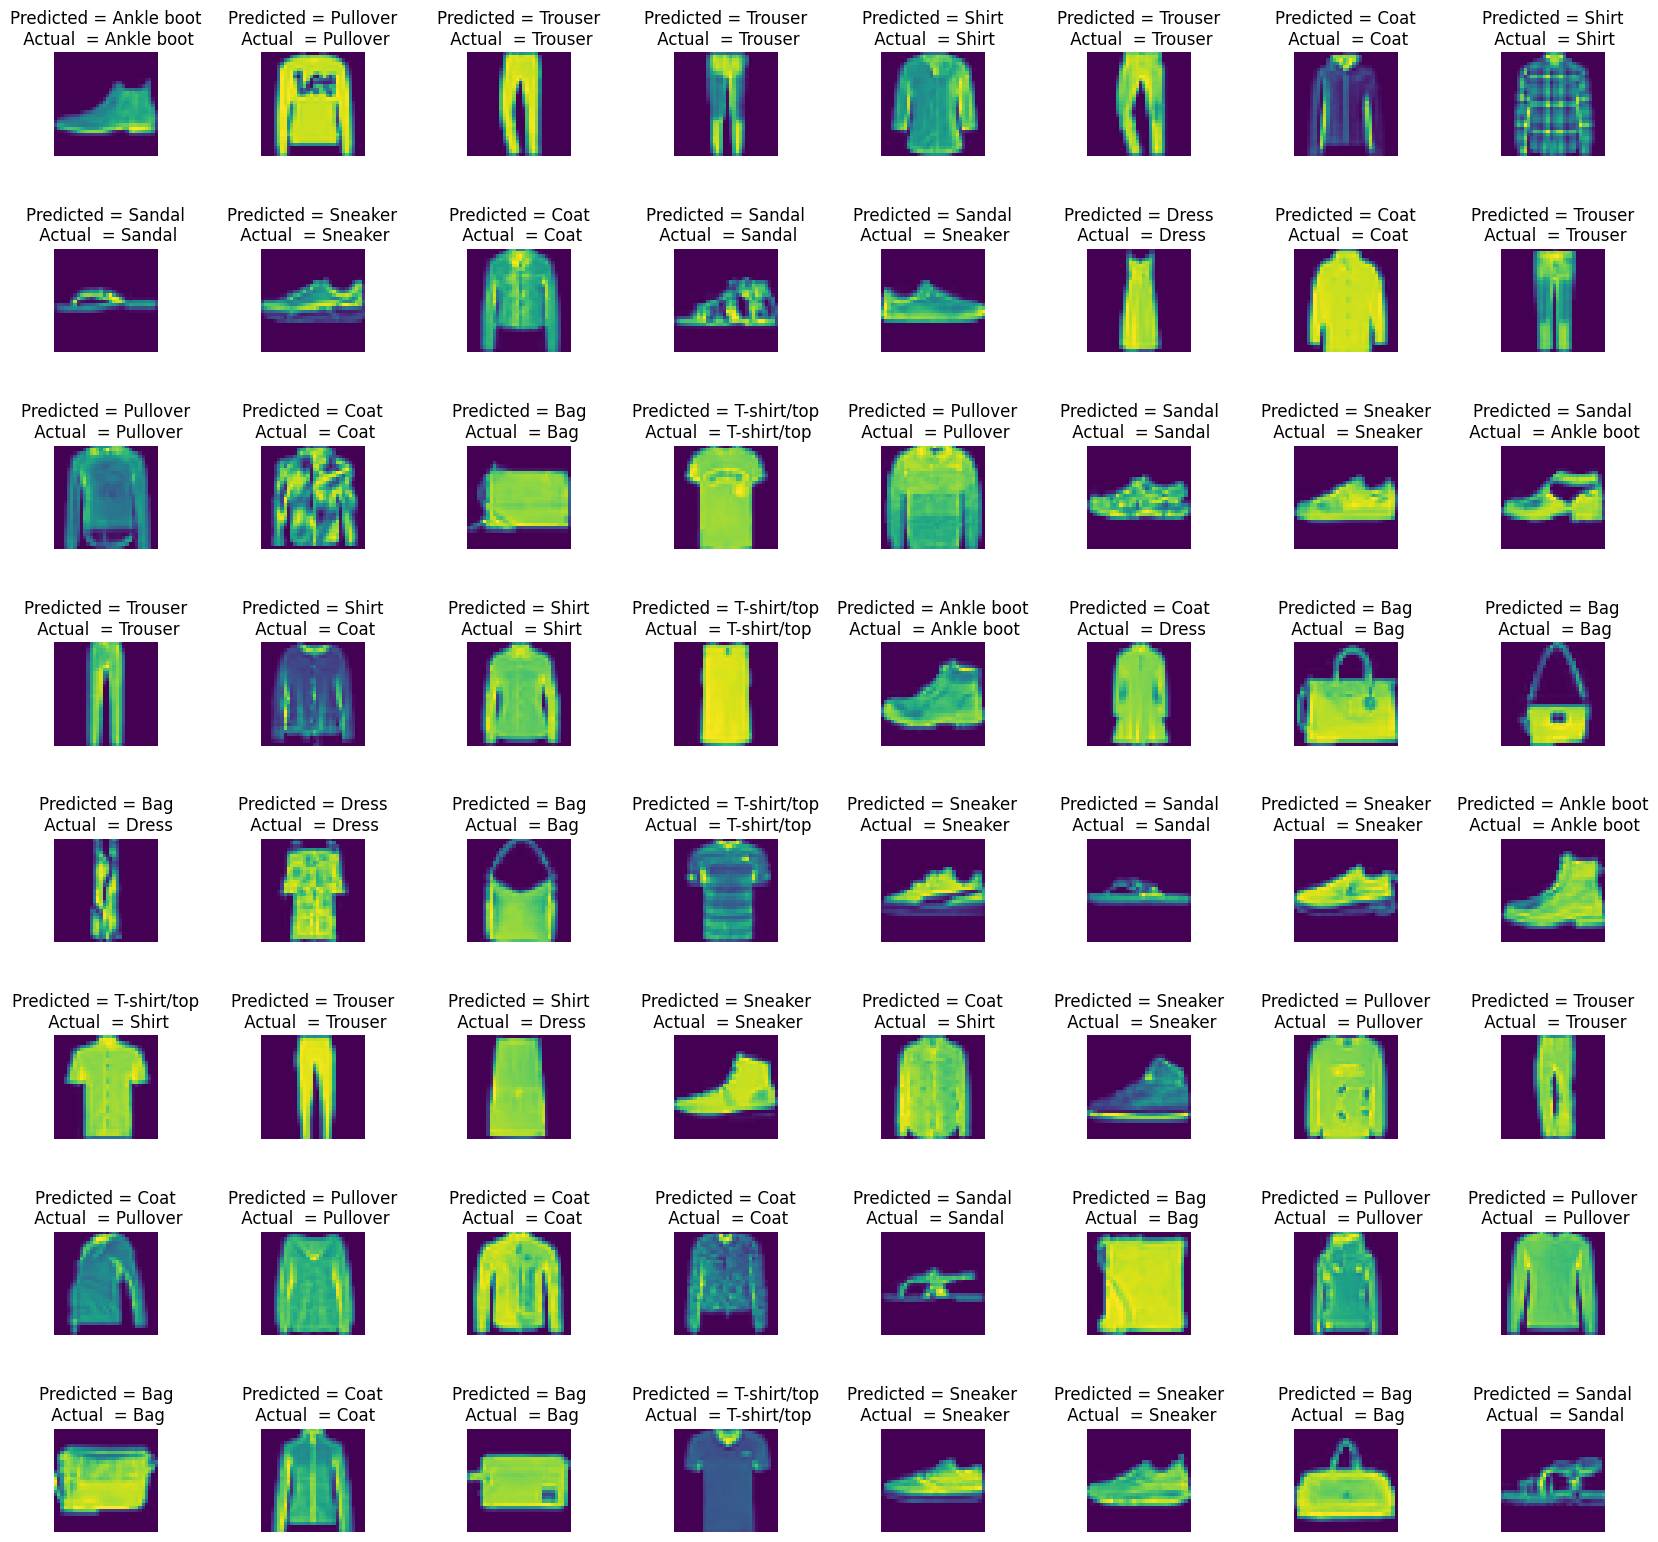

In [65]:
L = 8
W = 8
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(class_names[y_predictions1[i]], class_names[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

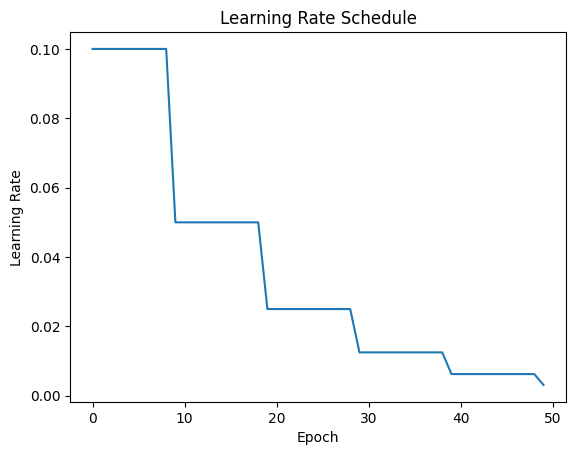

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define the learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

# Plot the learning rate schedule
lrate = [step_decay(i) for i in range(50)]
plt.plot(lrate)
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()


#AlexNet

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD

# Load the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to 32x32x1 and add a channel dimension
x_train = tf.image.resize(x_train[..., tf.newaxis], (32, 32))
x_test = tf.image.resize(x_test[..., tf.newaxis], (32, 32))

# Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16, kernel_size=(3,3), strides=(4,4), input_shape=(32,32,1), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
AlexNet.add(Conv2D(filters=60, kernel_size=(5,5), padding='same', activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
AlexNet.add(Conv2D(filters=60, kernel_size=(3,3), padding='same', activation='relu'))
AlexNet.add(Conv2D(filters=30, kernel_size=(3,3), padding='same', activation='relu'))
AlexNet.add(Conv2D(filters=20, kernel_size=(3,3), padding='same', activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(units=200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(units=200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(units=10, activation='softmax'))

# Compile the model
sgd = SGD(lr=0.01, momentum=0.9)
AlexNet.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = AlexNet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model on the testing set
test_loss, test_acc = AlexNet.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.9331 - accuracy: 0.6418 - val_loss: 0.5650 - val_accuracy: 0.7884
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4822 - accuracy: 0.8254 - val_loss: 0.4771 - val_accuracy: 0.8257
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4210 - accuracy: 0.8458 - val_loss: 0.4286 - val_accuracy: 0.8425
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3886 - accuracy: 0.8583 - val_loss: 0.4199 - val_accuracy: 0.8463
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3641 - accuracy: 0.8664 - val_loss: 0.3964 - val_accuracy: 0.8555
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3436 - accuracy: 0.8731 - val_loss: 0.3768 - val_accuracy: 0.8579
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3299 - accuracy: 0.8771 - val_loss: 0.3741 -

In [47]:
# Print model summary
AlexNet.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 8, 8, 16)          160       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 2, 2, 60)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 60)          32460     
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 30)         

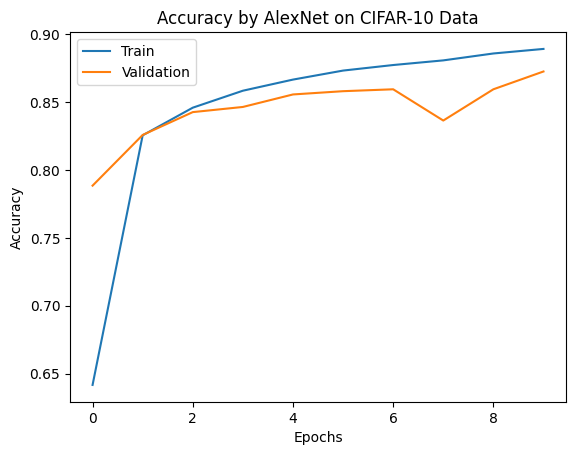

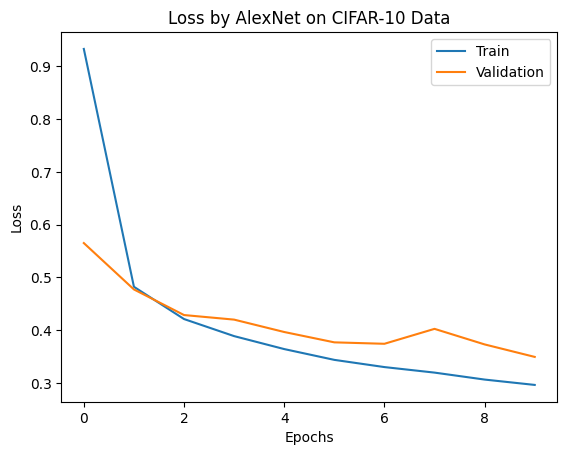

In [48]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [49]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 2s 7ms/step


array([[830,   2,  19,  41,   6,   1,  91,   0,  10,   0],
       [  1, 970,   0,  22,   3,   0,   2,   0,   2,   0],
       [ 12,   2, 752,  10, 143,   0,  77,   0,   4,   0],
       [ 17,   4,  10, 915,  28,   0,  22,   0,   4,   0],
       [  1,   0,  68,  51, 833,   0,  45,   0,   2,   0],
       [  0,   0,   1,   0,   0, 961,   0,  27,   0,  11],
       [141,   2,  75,  35, 128,   0, 601,   0,  18,   0],
       [  0,   0,   0,   0,   0,  36,   0, 938,   0,  26],
       [  2,   1,   1,   2,   5,   5,   7,   3, 974,   0],
       [  0,   0,   0,   0,   0,   9,   1,  40,   0, 950]])

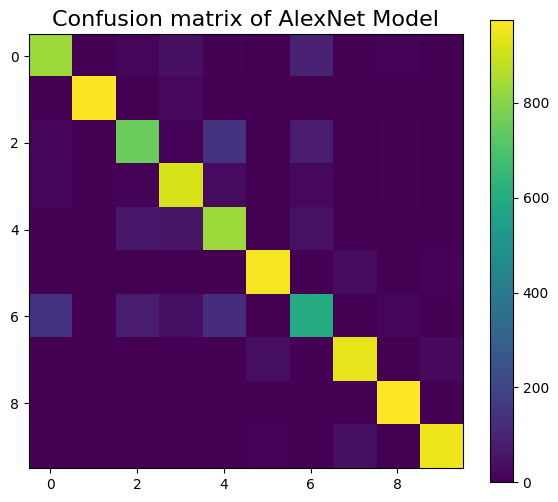

In [51]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.colorbar()
plt.show()

In [52]:
from sklearn.metrics import accuracy_score
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions1))

Test accuracy by AlexNet: 0.8724


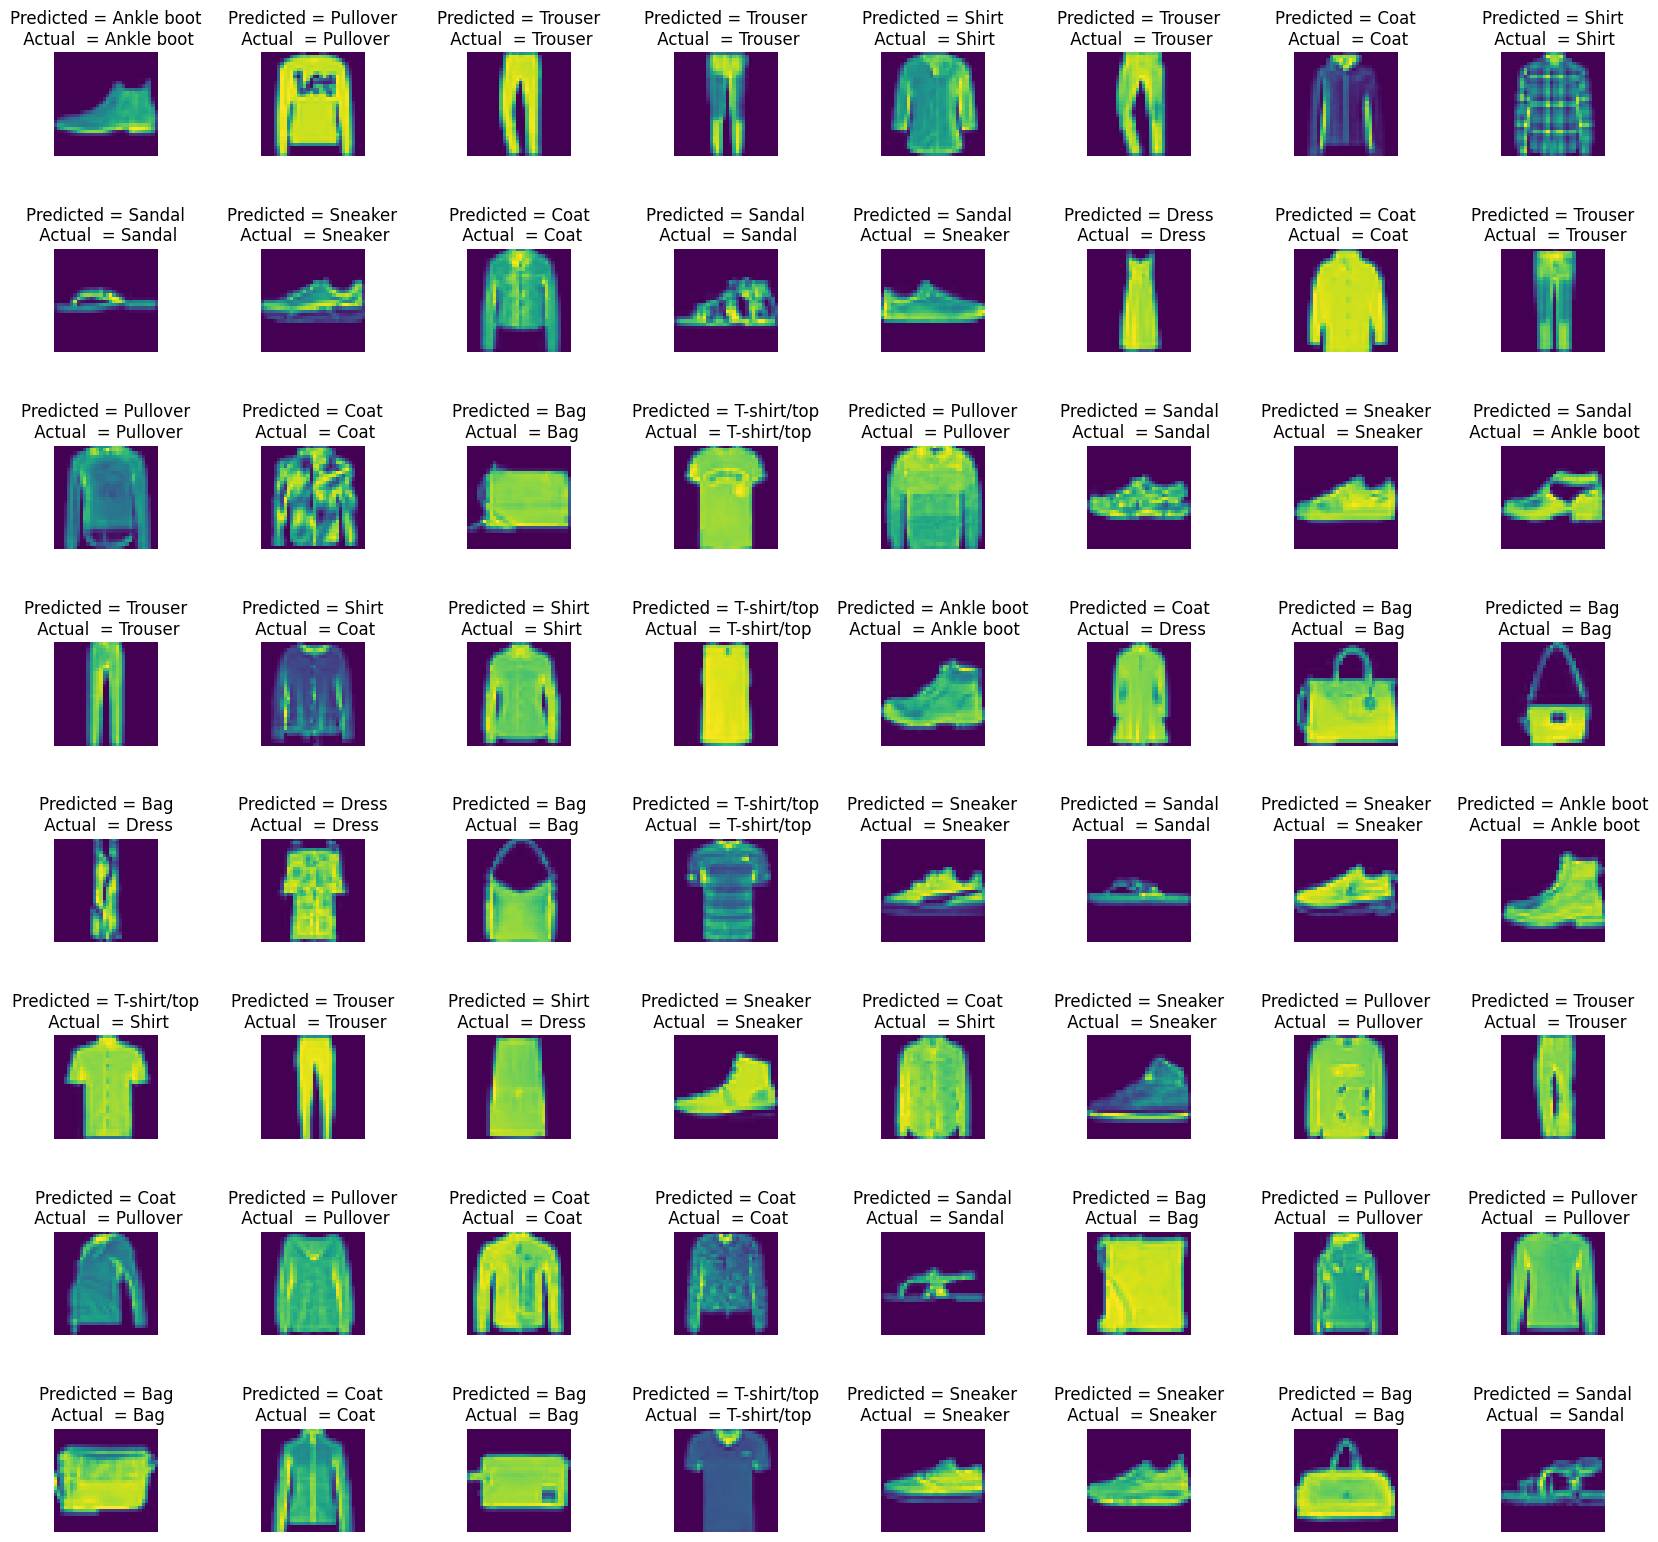

In [57]:
L = 8
W = 8
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(class_names[y_predictions1[i]], class_names[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

1/1 [==============================] - 0s 92ms/step


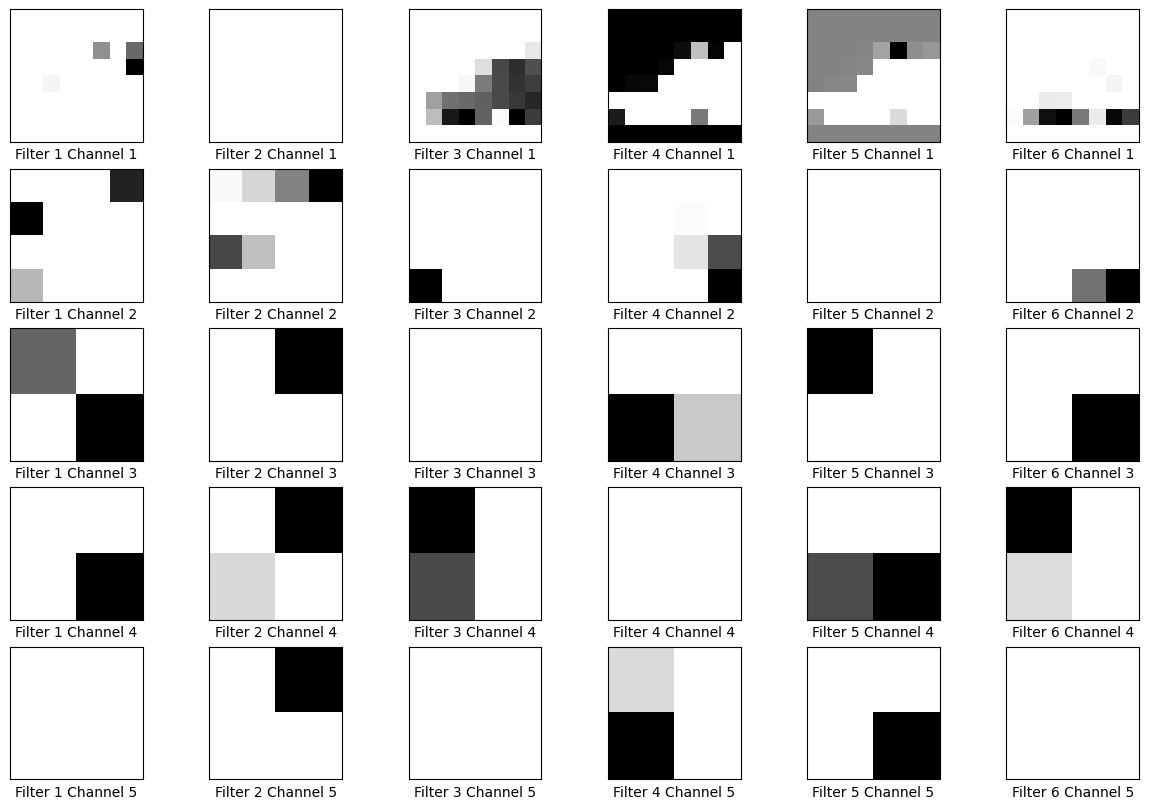

In [83]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Selecting the first convolutional layer for visualization
layer_index = 1
layer_outputs = [layer.output for layer in AlexNet.layers if isinstance(layer, Conv2D)]
activation_model = Model(inputs=AlexNet.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[:10])

# Creating the plot
plt.figure(figsize=(15, 10))
for j in range(len(activations)):
    for i in range(6):
        ax = plt.subplot(len(activations), 6, j*6+i+1)
        ax.imshow(activations[j][0, :, :, i], cmap='binary')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('Filter {} Channel {}'.format(i+1, j+1))
plt.show()

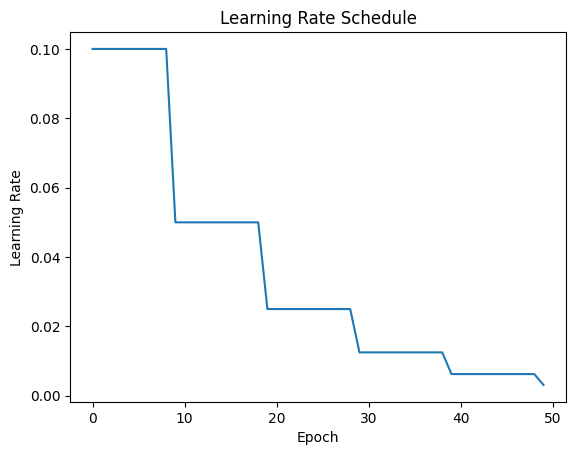

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

# Plot the learning rate schedule
lrate = [step_decay(i) for i in range(50)]
plt.plot(lrate)
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()
